In [208]:
import numpy as np
import sys
if '../' not in sys.path:
    sys.path.append('../')
import visualize_main as vm

In [209]:
def get_scores(model_groups, original_models, scores, inv_model_map):
    new_scores = {disease: [] for disease in scores.keys()}
    for group, new_models in model_groups.items():
        for model in new_models:
            original_model = inv_model_map[model]
            model_index = original_models.index(original_model)
            for key in scores.keys():
                new_scores[key].append(scores[key][model_index])

    return new_scores
def rename_tasks(scores: dict, task_rename:dict)-> dict:
    new_scores = {}
    for key in scores.keys():
        new_key = task_rename[key]
        new_scores[new_key] = scores[key]
    return new_scores

In [206]:
roc_scores = {'DEATH 60+ (1y)': [0.79232, 0.84539, 0.84615, 0.84688, 0.84206, 0.84595, 0.85567, 0.85687, 0.8562, 0.85479, 0.85706, 0.85787, 0.859, 0.85789, 0.85208, 0.85583, 0.85857, 0.85741, 0.85679, 0.83453, 0.85914], 'PAIN (1m)': [0.76528, 0.77013, 0.7774, 0.77874, 0.77797, 0.78124, 0.78481, 0.78502, 0.78478, 0.78414, 0.78739, 0.78511, 0.78663, 0.78642, 0.78226, 0.78565, 0.78736, 0.78744, 0.78717, 0.78158, 0.78749], 'INFECTION (1w)': [0.72669, 0.73867, 0.74367, 0.74341, 0.74373, 0.74366, 0.75124, 0.75201, 0.75384, 0.75174, 0.75493, 0.75356, 0.75241, 0.75296, 0.74723, 0.75574, 0.7564, 0.75495, 0.75392, 0.7337, 0.75696]}
roc_stds = {'DEATH 60+ (1y)': [0.00133, 0.00149, 0.00055, 0.00169, 0.00174, 0.00159, 0.00106, 0.0011, 0.00126, 0.00128, 0.00145, 0.00105, 0.00147, 0.00188, 0.00197, 0.00125, 0.00076, 0.00079, 0.0009, 0.01097, 0.00136], 'PAIN (1m)': [0.00073, 0.00131, 0.00079, 0.00063, 0.00021, 0.00036, 0.00062, 0.00045, 0.00054, 0.00056, 0.00106, 0.00108, 0.00056, 0.0003, 0.00024, 0.00118, 0.00059, 0.00037, 0.0005, 0.00154, 0.00084], 'INFECTION (1w)': [0.00105, 0.00065, 0.001, 0.00041, 0.00069, 0.00186, 0.00073, 0.001, 0.00084, 0.00121, 0.00114, 0.00142, 0.00111, 0.00116, 0.00122, 0.00125, 0.0006, 0.0006, 0.00085, 0.01044, 0.00101]}
pr_means =  {'DEATH 60+ (1y)': [0.52773, 0.60265, 0.60906, 0.61239, 0.61128, 0.61058, 0.63408, 0.63671, 0.63585, 0.63407, 0.6399, 0.641, 0.64201, 0.63875, 0.63275, 0.63439, 0.63565, 0.64209, 0.64129, 0.5687, 0.63852], 'PAIN (1m)': [0.79104, 0.79507, 0.80181, 0.8044, 0.80298, 0.80501, 0.80986, 0.80965, 0.80906, 0.80822, 0.81025, 0.80833, 0.80959, 0.80956, 0.80558, 0.80882, 0.81177, 0.81079, 0.81068, 0.80238, 0.81252], 'INFECTION (1w)': [0.77922, 0.78838, 0.79499, 0.79393, 0.79336, 0.79299, 0.80285, 0.80326, 0.8054, 0.80265, 0.80655, 0.80409, 0.80239, 0.80423, 0.79782, 0.80602, 0.80851, 0.80624, 0.80557, 0.78054, 0.80894]}
pr_stds = {'DEATH 60+ (1y)': [0.0021, 0.00352, 0.00228, 0.00369, 0.00388, 0.00294, 0.00303, 0.00265, 0.0036, 0.00232, 0.0045, 0.00223, 0.00393, 0.00418, 0.00319, 0.00449, 0.00148, 0.00201, 0.00145, 0.02032, 0.00339], 'PAIN (1m)': [0.0005, 0.0017, 0.00068, 0.00063, 0.00046, 0.00037, 0.00056, 0.00038, 0.00067, 0.00074, 0.00109, 0.00141, 0.00083, 0.00029, 0.00022, 0.00203, 0.00092, 0.00115, 0.0003, 0.00208, 0.001], 'INFECTION (1w)': [0.00127, 0.00056, 0.00087, 0.00056, 0.00056, 0.00188, 0.00101, 0.00102, 0.00131, 0.00169, 0.00117, 0.00188, 0.00139, 0.00261, 0.00123, 0.00144, 0.00098, 0.00094, 0.00087, 0.00896, 0.001]}
models = ['medbert_001_diag', '001_diag', '001', '111', '110', '111_no_binarysegments', '111_time2vec_abspos', '111_t2v_AgeAbspos_avg', '111_t2v_AgeAbspos_++_avg', '111_t2v_AgeAbspos_++_MRR10', '111_t2v_AgeAbspos_++_MRR20', '111_t2v_AgeAbspos_++_MRR25', '111_t2v_AgeAbspos_++_MRR30', '111_t2v_AgeAbspos_++_MRR50', '111_t2v_AgeAbspos_++_MRR20_PLOS', '111_t2v_AgeAbspos_++_MRR20_ATTENTION', '111_t2v_AgeAbspos_++_MRR20_BiLSTM', '111_t2v_AgeAbspos_++_MRR20_MAX', '111_t2v_AgeAbspos_++_MRR20_MEAN', '111_t2v_AgeAbspos_++_MRR20_SUM', '111_t2v_AgeAbspos_++_MRR20_BiGRU']
def compute_average(scores):
    return [np.mean([scores[key][i] for key in scores.keys() if scores[key][i] is not None])\
                          for i in range(len(scores[list(scores.keys())[0]]))]
def compute_avg_stds(scores):
    return [np.sqrt(np.mean([scores[key][i]**2 for key in scores.keys() if scores[key][i] is not None]))\
                        for i in range(len(scores[list(scores.keys())[0]]))]
roc_scores['average'] = compute_average(roc_scores) 
roc_stds['average'] = compute_avg_stds(roc_stds)
pr_means['average'] = compute_average(pr_means)
pr_stds['average'] = compute_avg_stds(pr_stds)

In [207]:
model_index = models.index('111_t2v_AgeAbspos_++_MRR20_SUM')
for k in roc_scores.keys():
    print(k, roc_scores[k][model_index], roc_stds[k][model_index])
    print(k, pr_means[k][model_index], pr_stds[k][model_index])


DEATH 60+ (1y) 0.83453 0.01097
DEATH 60+ (1y) 0.5687 0.02032
PAIN (1m) 0.78158 0.00154
PAIN (1m) 0.80238 0.00208
INFECTION (1w) 0.7337 0.01044
INFECTION (1w) 0.78054 0.00896
average 0.7832699999999999 0.008788365414948714
average 0.7172066666666668 0.012877763781029688


In [210]:
model_mapping = {
    'medbert_001_diag':'MedBERT', 
    '001_diag':'BEHRT', 
    '001':'+Med', 
    '111': '+FV+Sex', 
    '110':'[-SEP]',
    '111_no_binarysegments':'-Binary Segments', 
    '111_time2vec_abspos':'+time2vec(abspos)',
    '111_t2v_AgeAbspos_avg':'+time2vec(age)',
    '111_t2v_AgeAbspos_++_avg':'+RoPE+SwiGLU', 
    '111_t2v_AgeAbspos_++_MRR10':'[Masking Ratio 10%]',
    '111_t2v_AgeAbspos_++_MRR20':'Masking Ratio 20%',
    '111_t2v_AgeAbspos_++_MRR25':'[Masking Ratio 25%]',
    '111_t2v_AgeAbspos_++_MRR30':'[Masking Ratio 30%]',
    '111_t2v_AgeAbspos_++_MRR50':'[Masking Ratio 50%]',
    '111_t2v_AgeAbspos_++_MRR20_PLOS':'[Masking Ratio 20% + PLOS]',
    '111_t2v_AgeAbspos_++_MRR20_ATTENTION':'Weighted Attention',
    '111_t2v_AgeAbspos_++_MRR20_BiLSTM':'BiLSTM',
    '111_t2v_AgeAbspos_++_MRR20_MAX':'Max Pooling',
    '111_t2v_AgeAbspos_++_MRR20_MEAN':'Mean Pooling',
    '111_t2v_AgeAbspos_++_MRR20_BiGRU':'BiGRU'
}
new_model_names = [model_mapping[model] for model in models]


KeyError: '111_t2v_AgeAbspos_++_MRR20_SUM'

##

## Comparison Figure

In [211]:
roc_scores = {'DEATH 60+ (1y)': [0.79232, 0.84539, 0.84615, 0.84688, 0.84206, 0.84595, 0.85567, 0.85687, 0.8562, 0.85479, 0.85706, 0.85787, 0.859, 0.85789, 0.85208, 0.85583, 0.85857, 0.85741, 0.85679, 0.83453, 0.85914], 'PAIN (1m)': [0.76528, 0.77013, 0.7774, 0.77874, 0.77797, 0.78124, 0.78481, 0.78502, 0.78478, 0.78414, 0.78739, 0.78511, 0.78663, 0.78642, 0.78226, 0.78565, 0.78736, 0.78744, 0.78717, 0.78158, 0.78749], 'INFECTION (1w)': [0.72669, 0.73867, 0.74367, 0.74341, 0.74373, 0.74366, 0.75124, 0.75201, 0.75384, 0.75174, 0.75493, 0.75356, 0.75241, 0.75296, 0.74723, 0.75574, 0.7564, 0.75495, 0.75392, 0.7337, 0.75696]}
roc_stds = {'DEATH 60+ (1y)': [0.00133, 0.00149, 0.00055, 0.00169, 0.00174, 0.00159, 0.00106, 0.0011, 0.00126, 0.00128, 0.00145, 0.00105, 0.00147, 0.00188, 0.00197, 0.00125, 0.00076, 0.00079, 0.0009, 0.01097, 0.00136], 'PAIN (1m)': [0.00073, 0.00131, 0.00079, 0.00063, 0.00021, 0.00036, 0.00062, 0.00045, 0.00054, 0.00056, 0.00106, 0.00108, 0.00056, 0.0003, 0.00024, 0.00118, 0.00059, 0.00037, 0.0005, 0.00154, 0.00084], 'INFECTION (1w)': [0.00105, 0.00065, 0.001, 0.00041, 0.00069, 0.00186, 0.00073, 0.001, 0.00084, 0.00121, 0.00114, 0.00142, 0.00111, 0.00116, 0.00122, 0.00125, 0.0006, 0.0006, 0.00085, 0.01044, 0.00101]}
pr_means =  {'DEATH 60+ (1y)': [0.52773, 0.60265, 0.60906, 0.61239, 0.61128, 0.61058, 0.63408, 0.63671, 0.63585, 0.63407, 0.6399, 0.641, 0.64201, 0.63875, 0.63275, 0.63439, 0.63565, 0.64209, 0.64129, 0.5687, 0.63852], 'PAIN (1m)': [0.79104, 0.79507, 0.80181, 0.8044, 0.80298, 0.80501, 0.80986, 0.80965, 0.80906, 0.80822, 0.81025, 0.80833, 0.80959, 0.80956, 0.80558, 0.80882, 0.81177, 0.81079, 0.81068, 0.80238, 0.81252], 'INFECTION (1w)': [0.77922, 0.78838, 0.79499, 0.79393, 0.79336, 0.79299, 0.80285, 0.80326, 0.8054, 0.80265, 0.80655, 0.80409, 0.80239, 0.80423, 0.79782, 0.80602, 0.80851, 0.80624, 0.80557, 0.78054, 0.80894]}
pr_stds = {'DEATH 60+ (1y)': [0.0021, 0.00352, 0.00228, 0.00369, 0.00388, 0.00294, 0.00303, 0.00265, 0.0036, 0.00232, 0.0045, 0.00223, 0.00393, 0.00418, 0.00319, 0.00449, 0.00148, 0.00201, 0.00145, 0.02032, 0.00339], 'PAIN (1m)': [0.0005, 0.0017, 0.00068, 0.00063, 0.00046, 0.00037, 0.00056, 0.00038, 0.00067, 0.00074, 0.00109, 0.00141, 0.00083, 0.00029, 0.00022, 0.00203, 0.00092, 0.00115, 0.0003, 0.00208, 0.001], 'INFECTION (1w)': [0.00127, 0.00056, 0.00087, 0.00056, 0.00056, 0.00188, 0.00101, 0.00102, 0.00131, 0.00169, 0.00117, 0.00188, 0.00139, 0.00261, 0.00123, 0.00144, 0.00098, 0.00094, 0.00087, 0.00896, 0.001]}
models = ['medbert_001_diag', '001_diag', '001', '111', '110', '111_no_binarysegments', '111_time2vec_abspos', '111_t2v_AgeAbspos_avg', '111_t2v_AgeAbspos_++_avg', '111_t2v_AgeAbspos_++_MRR10', '111_t2v_AgeAbspos_++_MRR20', '111_t2v_AgeAbspos_++_MRR25', '111_t2v_AgeAbspos_++_MRR30', '111_t2v_AgeAbspos_++_MRR50', '111_t2v_AgeAbspos_++_MRR20_PLOS', '111_t2v_AgeAbspos_++_MRR20_ATTENTION', '111_t2v_AgeAbspos_++_MRR20_BiLSTM', '111_t2v_AgeAbspos_++_MRR20_MAX', '111_t2v_AgeAbspos_++_MRR20_MEAN', '111_t2v_AgeAbspos_++_MRR20_SUM', '111_t2v_AgeAbspos_++_MRR20_BiGRU']
roc_scores['average'] = [np.mean([roc_scores[key][i] for key in roc_scores.keys() if roc_scores[key][i] is not None])\
                          for i in range(len(roc_scores['DEATH 60+ (1y)']))]
roc_stds['average'] = [np.sqrt(np.mean([roc_stds[key][i]**2 for key in roc_stds.keys() if roc_stds[key][i] is not None]))\
                        for i in range(len(roc_stds['DEATH 60+ (1y)']))]

task_rename = {
    'average':'average',
    'DEATH 60+ (1y)': 'Death 60+ (1 yr.)',
    'PAIN (1m)': 'Pain\nTreatment (1 mo.)',
    'INFECTION (1w)': 'General\nInfection (1 wk.)',
}
roc_scores= rename_tasks(roc_scores, task_rename)   
roc_stds = rename_tasks(roc_stds, task_rename)

In [223]:
model_mapping_mrs = {
    '111_t2v_AgeAbspos_++_MRR10':'10%',
    '111_t2v_AgeAbspos_++_avg':'15%',
    '111_t2v_AgeAbspos_++_MRR20':'20%',
    '111_t2v_AgeAbspos_++_MRR25':'25%',
    '111_t2v_AgeAbspos_++_MRR30':'30%',
    '111_t2v_AgeAbspos_++_MRR50':'50%',
}

model_mapping_heads = {
    '111_t2v_AgeAbspos_++_avg':'CLS',
    '111_t2v_AgeAbspos_++_MRR20_ATTENTION':'Attention\nWeighted',
    '111_t2v_AgeAbspos_++_MRR20_MAX':'Max',
    '111_t2v_AgeAbspos_++_MRR20_MEAN':'Mean',
    '111_t2v_AgeAbspos_++_MRR20_SUM':'Sum',
    '111_t2v_AgeAbspos_++_MRR20_BiLSTM':'BiLSTM',
    '111_t2v_AgeAbspos_++_MRR20_BiGRU':'BiGRU'
}

In [224]:

colors = { 'average':'k','Pain\nTreatment (1 mo.)': '#07A0C3', 'Death 60+ (1 yr.)': '#BD1E1E','General\nInfection (1 wk.)': '#AB63FA', }


inv_model_map_mrs = {v:k for k,v in model_mapping_mrs.items()}
model_groups_mrs = {
    'Data': ['10%', '15%', '20%', '25%', '30%', '50%'],
}


groups_mrs = {
    'Data': slice(0, len(model_groups_mrs['Data'])),}
roc_scores_mrs = get_scores(model_groups_mrs, models,  roc_scores, inv_model_map_mrs)
roc_stds_mrs = get_scores(model_groups_mrs, models,  roc_stds, inv_model_map_mrs)

models_mrs = [model for group in model_groups_mrs.values() for model in group]
model_adapted_mrs = [True] * len(models_mrs)

In [241]:
inv_model_map_heads = {v:k for k,v in model_mapping_heads.items()}

model_groups_heads = {
    'Data': ['CLS', 'Attention\nWeighted','Mean', 'Max',  'BiLSTM', 'BiGRU',],
}

groups_heads = {
    'Data': slice(0, len(model_groups_heads['Data'])),}
roc_scores_heads = get_scores(model_groups_heads, models,  roc_scores, inv_model_map_heads)
roc_stds_heads = get_scores(model_groups_heads, models,  roc_stds, inv_model_map_heads)

models_heads = [model for group in model_groups_heads.values() for model in group]
model_adapted_heads = [True] * len(models_heads)

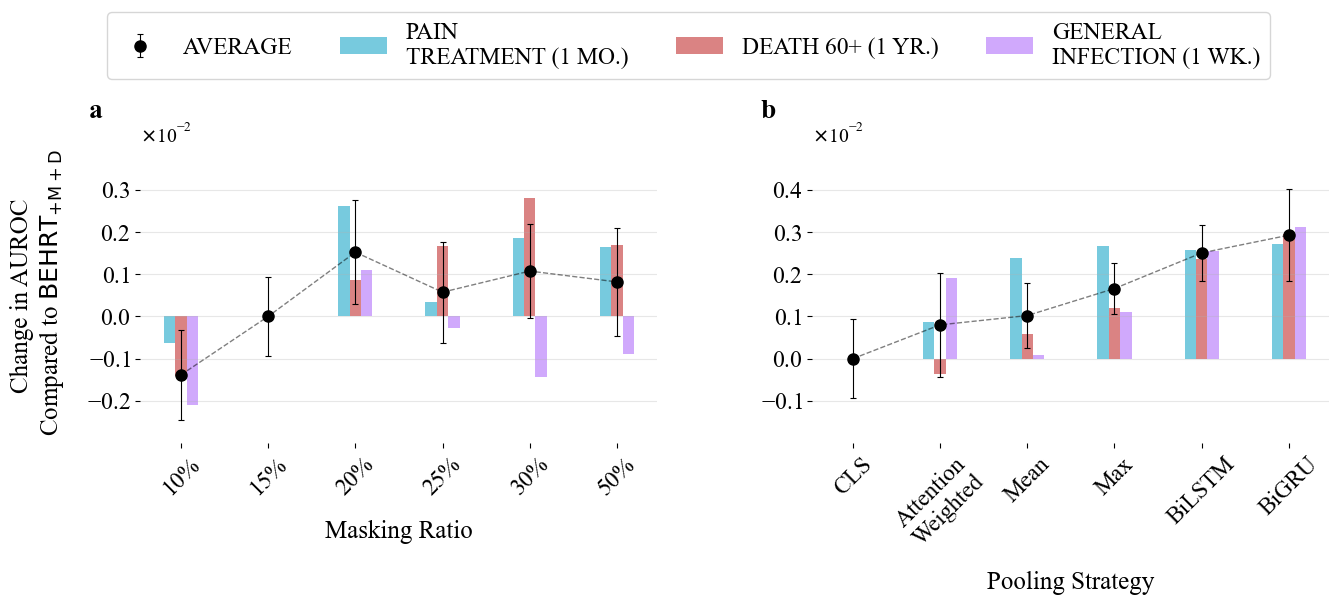

In [242]:

import importlib
import matplotlib.pyplot as plt
import string
importlib.reload(vm)
plt.rcParams['font.family'] = "Times New Roman"
FIGSIZE = (15, 7)
MODEL_DISTANCE = 0.15
GROUP_GAP = 0.0
LEGEND_LOC = (0.06, .9)
GROUP_LABEL_PAD = 0.01
Y_LIM = (-.002, .006)
GROUP_LABEL_FS = 17
# BOX_COLORS = {'Data': "#5599FF", 'Model': "#5599FF", 'Training': "#5599FF"}
FONTSIZE1 = 17
FONTSIZE2 = 18
Y_POS_BRACKET = -.3
GROUP_ANNOTATION_DISTANCE = 0.05
#colors = { 'average':'k','Pain\nTreatment (1 mo.)': '#07A0C3', 'Death 60+ (1 yr.)': '#BD1E1E','General\nInfection (1 wk.)': '#AB63FA', }

def main():
    # Your data initialization here
    fig, ax = plt.subplots(1,2,figsize=FIGSIZE)
    ax1 = ax[0]
    ax2 = ax[1]
    adjusted_positions, _, _ = vm.initialize_plot(models_mrs, groups_mrs, MODEL_DISTANCE, GROUP_GAP)
    vm.plot_data(ax1, adjusted_positions, model_adapted_mrs, roc_scores_mrs, roc_stds_mrs, colors, MODEL_DISTANCE, normalization_model=1)

    # Setting the x-ticks to be the diseases with adjusted positions
    ax1.set_xticks(adjusted_positions + MODEL_DISTANCE*2)
    ax1.set_xticklabels(models_mrs, fontsize=FONTSIZE1, rotation=45, color='k')
    vm.set_model_adapted_colors(ax1, model_adapted_mrs)

    ax1.set_ylim((-0.003, 0.004))
    y_ticklabels = [-.002,-.001, 0, .001,.002,.003,
                    ]
    vm.style_plot(ax1, y_ticklabels, FONTSIZE1, LEGEND_LOC, legend=False)    
    #ax1.set_ylabel('Change in AUROC\n Compared to '+r'$\mathrm{BEHRT}_{+\mathrm{M}+\mathrm{D}}$', fontsize=FONTSIZE2, color='k',labelpad=15)
    ax1.set_ylabel('Change in AUROC\n Compared to '+r'$\mathrm{BEHRT}_{+\mathrm{M}+\mathrm{D}}$', fontsize=FONTSIZE2, color='k',labelpad=15)


    adjusted_positions, _, _ = vm.initialize_plot(models_heads, groups_heads, MODEL_DISTANCE, GROUP_GAP)
    vm.plot_data(ax2, adjusted_positions, model_adapted_heads, roc_scores_heads, roc_stds_heads, colors, MODEL_DISTANCE)
    # Setting the x-ticks to be the diseases with adjusted positions
    ax2.set_xticks(adjusted_positions + MODEL_DISTANCE*2)
    ax2.set_xticklabels(models_heads, fontsize=FONTSIZE1, rotation=45, color='k')
    vm.set_model_adapted_colors(ax2, model_adapted_heads)

    ax2.set_ylim((-0.002, 0.005))
    y_ticklabels = [ -.001,0, .001,.002,.003,.004,
                    ]
    vm.style_plot(ax2, y_ticklabels, FONTSIZE1, LEGEND_LOC, legend=False)    
    ax2.set_ylabel('', fontsize=FONTSIZE2, color='k',labelpad=15)
    ax1.set_xlabel('Masking Ratio', fontsize=FONTSIZE2, color='k',labelpad=15)
    ax2.set_xlabel('Pooling Strategy', fontsize=FONTSIZE2, color='k',labelpad=15)
    h, l = ax2.get_legend_handles_labels()
    fig.legend(h,l,loc=(0.08,.87), fontsize=FONTSIZE1, ncol=4, frameon=True)
    # extend plot window to fit legend
    #plt.subplots_adjust(top=1.5)
    for n, a in enumerate(ax):
        a.text(-0.1, 1.1, string.ascii_lowercase[n], transform=a.transAxes, 
                size=20, weight='bold')
    plt.subplots_adjust(wspace=-0.2)
    plt.tight_layout(pad=6.5)
    plt.show()

    fig.savefig('../../results/roc_scores_comparison_mr_heads.png', dpi=300, bbox_inches='tight')

if __name__ == "__main__":
    main()
